# Instructions


The assignment is at the bottom!

## This cell automatically downloads Capital Bikeshare data

### And here we read in the data

In [1]:
!pip install seaborn

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np


day_hour_count = pd.read_csv("../data/bikeshare_hour_count.csv")
day_hour_count

,hour_of_day,0,1,2,3,4,5,6
0,0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
1,0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
2,0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
3,0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
4,0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...,...
235,23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
236,23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
237,23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0
238,23.8,33.0,52.0,47.0,79.0,91.0,93.0,24.0


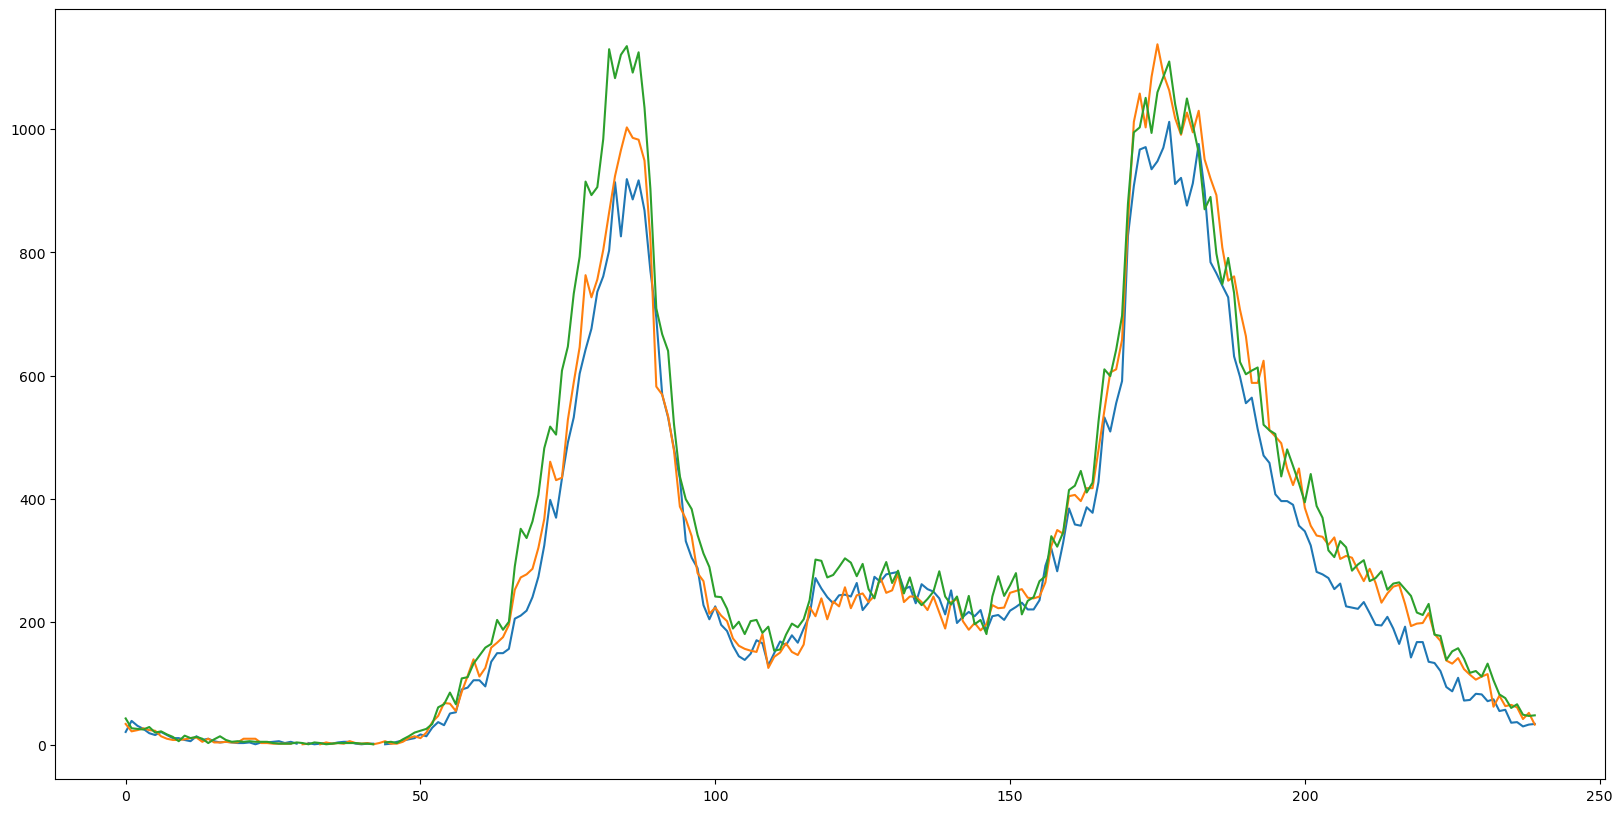

In [3]:
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count["0"])
plt.plot(day_hour_count.index, day_hour_count["1"])
plt.plot(day_hour_count.index, day_hour_count["2"])

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

# 1. Using the **`day_hour_count`** dataframe create two dataframes `monday` and `saturday` that represent the data for those days. (hint: Monday is day=0)

In [4]:
monday = day_hour_count[["hour_of_day", "0"]].copy()
monday


,hour_of_day,0
0,0.0,21.0
1,0.1,39.0
2,0.2,31.0
3,0.3,26.0
4,0.4,19.0
...,...,...
235,23.5,36.0
236,23.6,37.0
237,23.7,30.0
238,23.8,33.0


In [5]:
saturday = day_hour_count[["hour_of_day", "5"]].copy()
saturday


,hour_of_day,5
0,0.0,89.0
1,0.1,87.0
2,0.2,98.0
3,0.3,99.0
4,0.4,98.0
...,...,...
235,23.5,93.0
236,23.6,95.0
237,23.7,105.0
238,23.8,93.0



## 2a. Create 3 models fit to `monday.hour_of_day` with varying polynomial degrees ( choose from `n=5,10,15`). (Repeat for `saturday` below)

## Plot all the results for each polynomial.

In [6]:
#Check NaN
monday[monday['0'].isna()]


,hour_of_day,0
30,3.0,NaN
43,4.3,NaN


In [9]:
#Fill any NaNs with 0
monday[['0']] = monday[['0']].fillna(0)

In [10]:
#Sum/ count NaNs
monday[['0']].isna().sum()

0    0
dtype: int64

In [27]:
from sklearn import linear_model
linear = linear_model.LinearRegression()
from sklearn.preprocessing import PolynomialFeatures
x = monday[["hour_of_day"]]
my = monday[['0']]

#5 degrees
x_5 = PolynomialFeatures(degree=5).fit_transform(x.values)
#10 degrees
x_10 = PolynomialFeatures(degree=10).fit_transform(x.values)
#15 degrees
x_15 = PolynomialFeatures(degree=15).fit_transform(x.values)

#linear fit
mon_lin_5 = linear.fit(x_5, my).predict(x_5)
mon_lin_10 = linear.fit(x_10, my).predict(x_10)
mon_lin_15 = linear.fit(x_15, my).predict(x_15)


Text(0.5, 1.0, 'FIGURE 1')

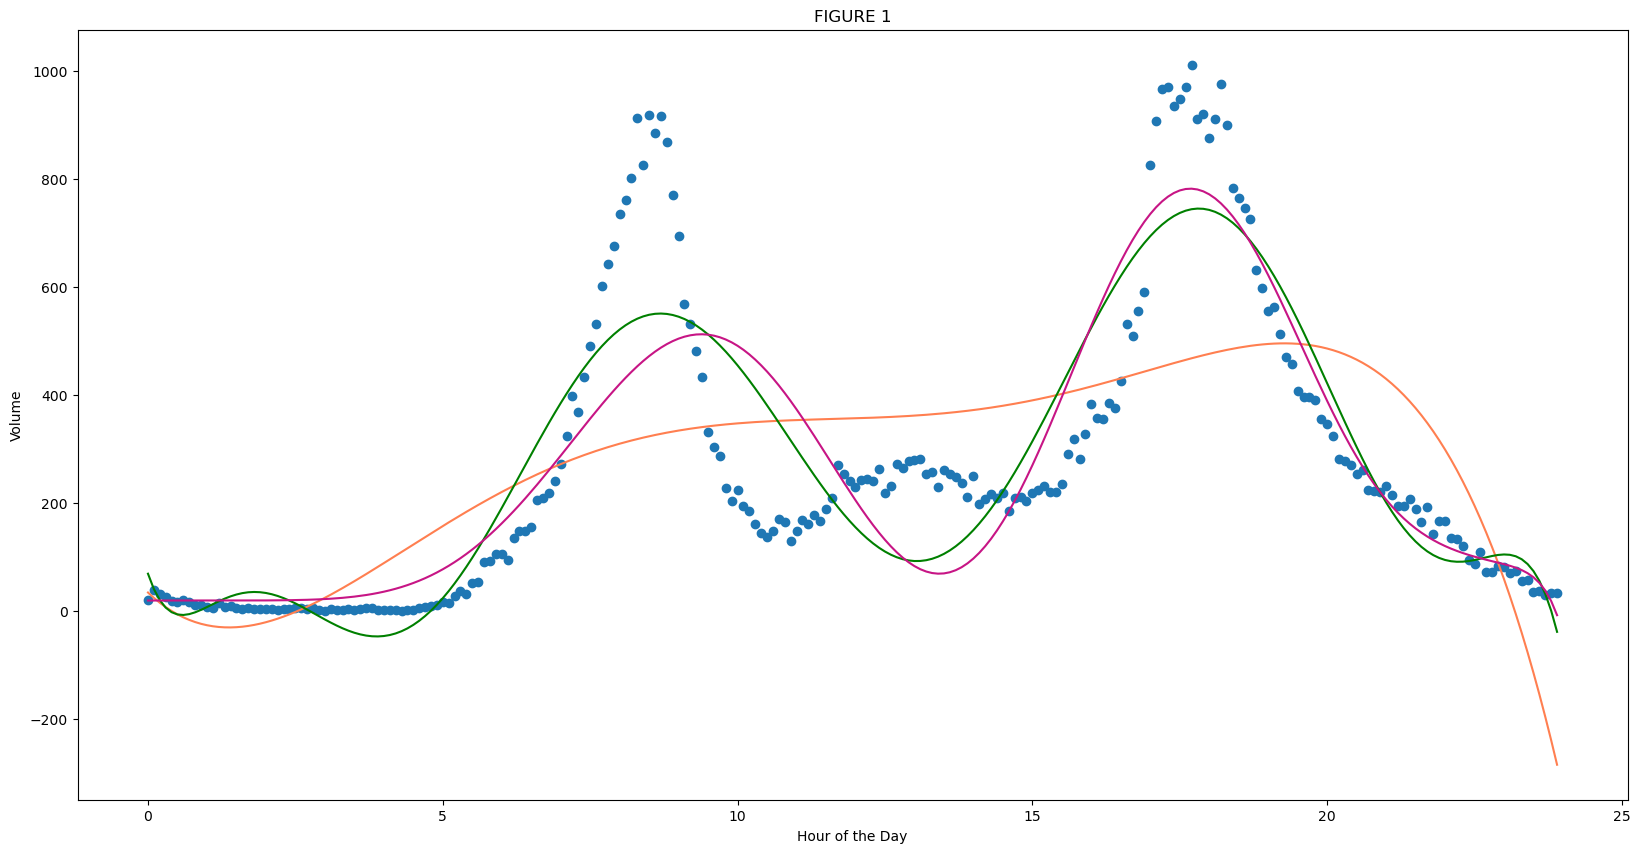

In [54]:
#plot linear models
plt.scatter(x, my)
plt.plot(x, mon_lin_5, c = 'coral')
plt.plot(x, mon_lin_10, c = 'green')
plt.plot(x, mon_lin_15, c = 'mediumvioletred')
plt.xlabel('Hour of the Day')
plt.ylabel('Volume')
plt.title("FIGURE 1")


## 2b. Repeat `2a` for `saturday.hour_of_day`

In [13]:
#fill any NaNs with 0
saturday[['5']] = saturday[['5']].fillna(0)


Text(0.5, 1.0, 'FIGURE 2')

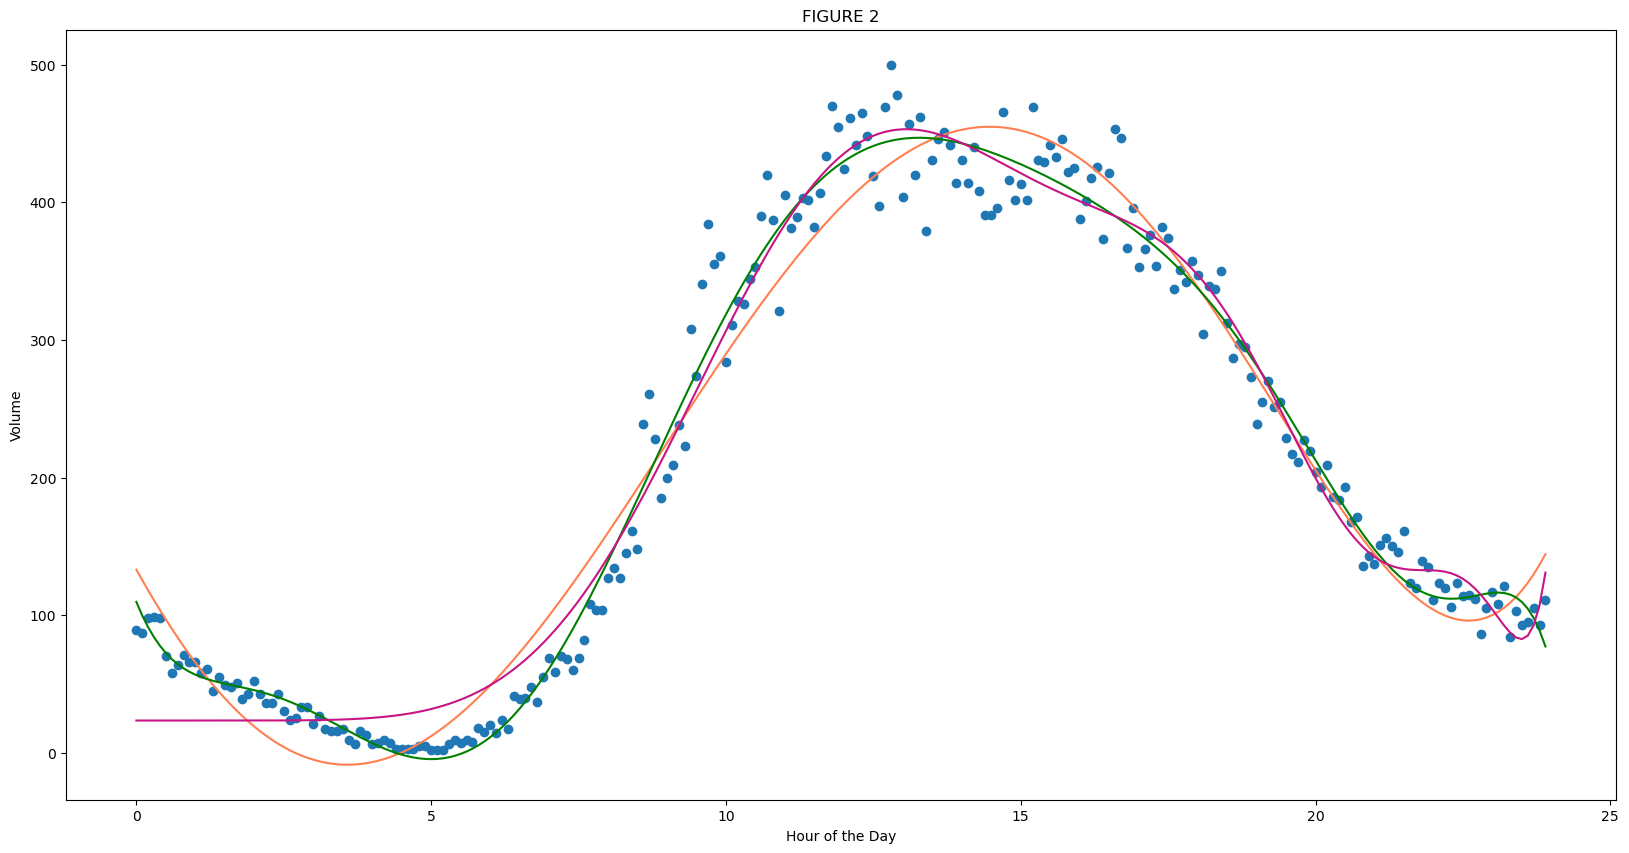

In [55]:
#linear fit and plot
sy = saturday[['5']]
sat_lin_5 = linear.fit(x_5, sy).predict(x_5)
sat_lin_10 = linear.fit(x_10, sy).predict(x_10)
sat_lin_15 = linear.fit(x_15, sy).predict(x_15)
plt.scatter(x, sy)
plt.plot(x, sat_lin_5, c = 'coral')
plt.plot(x, sat_lin_10, c = 'green')
plt.plot(x, sat_lin_15, c = 'mediumvioletred')
plt.xlabel('Hour of the Day')
plt.ylabel('Volume')
plt.title("FIGURE 2")


## 3. Using the n=15 polynomial, create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values using the `monday` and `saturday` datasets.


Text(0.5, 1.0, 'FIGURE 3')

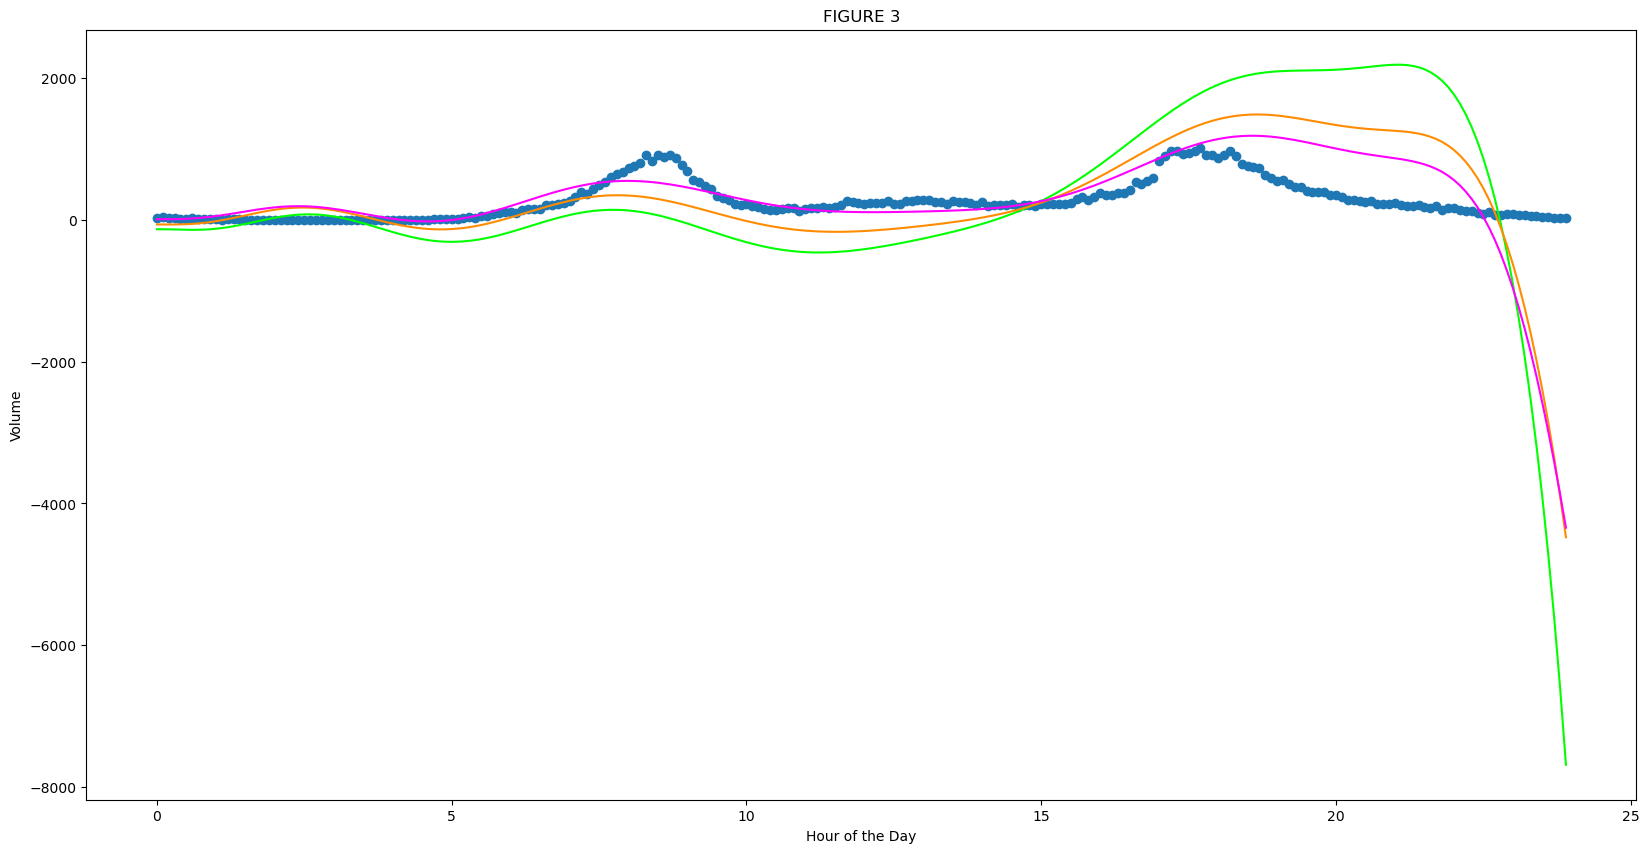

In [52]:
#Monday
mon_rge_1 = linear_model.Ridge(alpha=1).fit(x_15, my).predict(x_15)
mon_rge_10 = linear_model.Ridge(alpha=10).fit(x_15, my).predict(x_15)
mon_rge_25 = linear_model.Ridge(alpha=25).fit(x_15, my).predict(x_15)
plt.scatter(x, my)
plt.plot(x, mon_rge_1, c = 'lime')
plt.plot(x, mon_rge_10, c = 'darkorange')
plt.plot(x, mon_rge_25, c = 'magenta')
plt.xlabel('Hour of the Day')
plt.ylabel('Volume')
plt.title("FIGURE 3")


Text(0.5, 1.0, 'FIGURE 4')

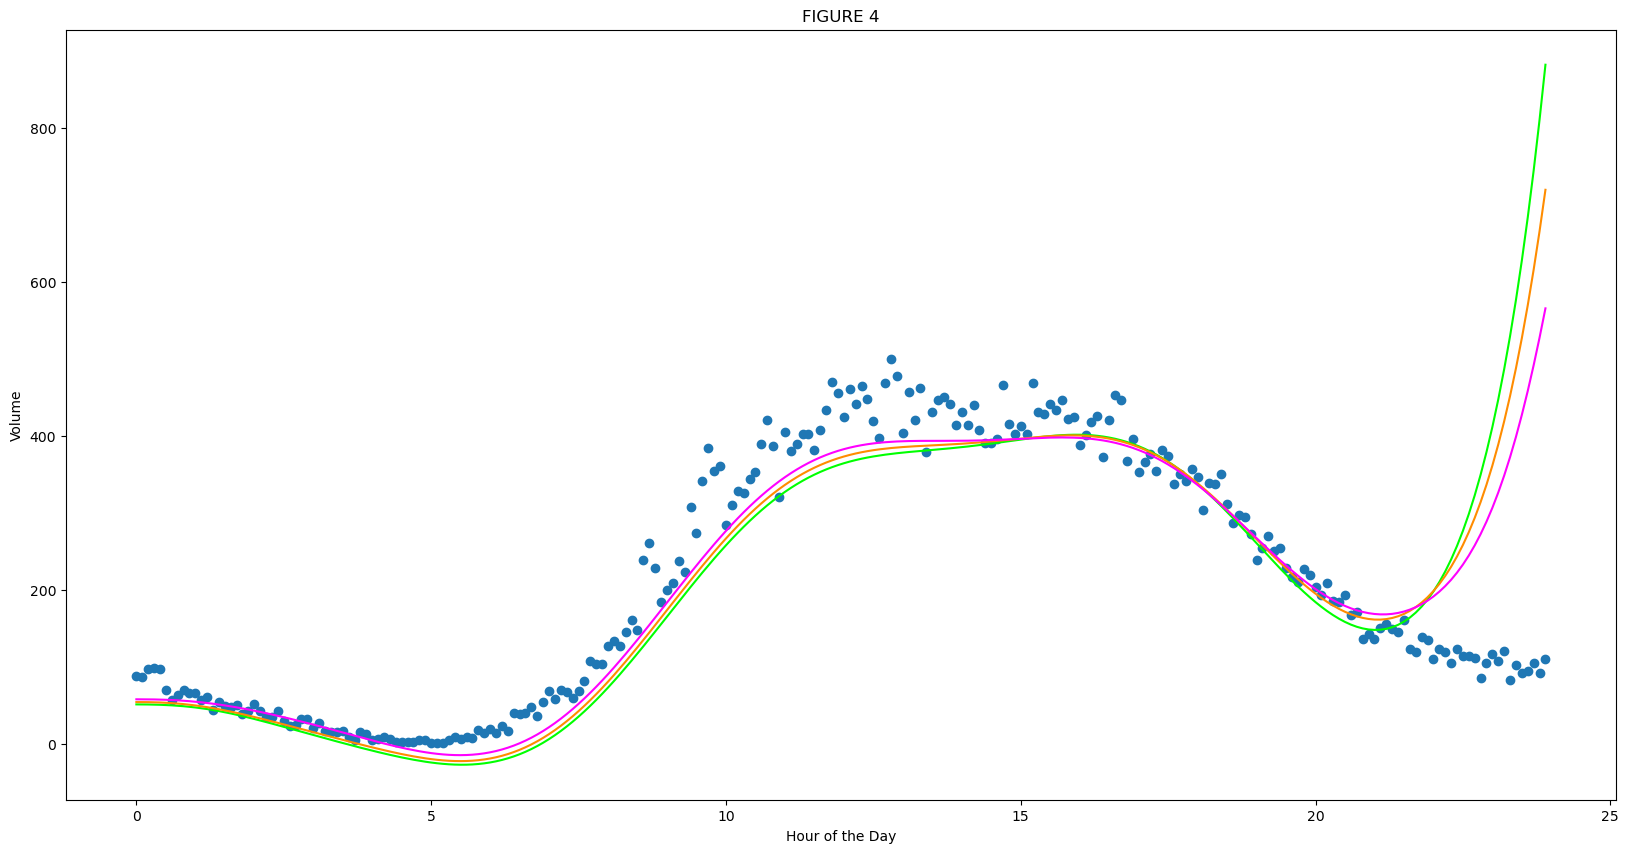

In [53]:
#Saturday
sat_rge_1 = linear_model.Ridge(alpha=1).fit(x_15, sy).predict(x_15)
sat_rge_10 = linear_model.Ridge(alpha=10).fit(x_15, sy).predict(x_15)
sat_rge_50 = linear_model.Ridge(alpha=50).fit(x_15, sy).predict(x_15)
plt.scatter(x, sy)
plt.plot(x, sat_rge_1, c = 'lime')
plt.plot(x, sat_rge_10, c = 'darkorange')
plt.plot(x, sat_rge_50, c = 'magenta')
plt.xlabel('Hour of the Day')
plt.ylabel('Volume')
plt.title("FIGURE 4")


## 4. Describe your results and which `n` and  $\alpha$ you find fits the data best to your models

I think it would be cool if I could grab the next few weeks of data and evaluate the performance of the models against that, using MSE or R^2, but I don't know how to pull that data. I understand that there is some way to use the existing data even though the models were trained on it (k-fold cross-validation?), but I was unable to modify a section of sample code to get it to work. 

In Figure 1, comparing the linear models for Monday, we see that the model with 5 polynomial degrees performs poorly throughouth the day, the 10 and 15 degree models underestimate the morning rush and do better in the evening, and that the 15 degree model fits the closest. 

In Figure 2, comparing the linear models for Saturday, we see all models peforming quite a bit better, with some funk at the predictions near the early morning hours. The 10 degree model fits the closest.

In Figure 3, comparing the ridge models for Monday, we see the model predictions generally conforming for most of the day- though under estimaing mid day, overestimating after work hours, before completely dropping off and greatly underestimating just prior to midnight.  

In Figure 4, comparing the ridge models for Saturday, we see the model predictions generally conforming for the majority of the day- though still slightly under estimaing mid day, but then taking off and greatly overestimating after 9PM.

It appears by examining the plots that the 10 degree linear plot for Saturday performs the best against the data for that day, and the best of all models tested. The best model for Monday appears to be the 15 degree linear, though it underestimates all peaks.